In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import pandas as pd
import datetime
import my_tools as mt
from IPython.display import HTML


df_cases_daily = mt.read_csv('cases_daily', 'daily cases')
df_cases_total = mt.read_csv('cases_total','Total cases')
df_cases_weekly = mt.read_csv('cases_weekly', 'New cases weekly')

df_deaths_daily = mt.read_csv('deaths_daily', 'daily deaths')
df_deaths_total = mt.read_csv('deaths_total', 'Total deaths')
df_deaths_weekly = mt.read_csv('deaths_weekly', 'New deaths weekly')

df_prevalence = mt.read_csv('prevalence', 'Prevalence')
df_incidence_daily = mt.read_csv('incidence_daily', 'Daily incidence')
df_incidence_weekly = mt.read_csv('incidence_weekly', 'Weekly incidence')
df_mortality = mt.read_csv('mortality', 'Mortality')

df_global = mt.read_csv('global', 'Global data')

df_thresholds = pd.read_csv('../data/thresholds.csv').set_index('ind')

countries = df_cases_daily.columns
dates = df_cases_daily.index
dates_weekly = df_cases_weekly.index

latest_date = dates[-1]

In [31]:
def plot_trends_dynamically2(countries=[]):
    fig, ax = plt.subplots(figsize=(17,9))
    leg = ax.legend()
    
    df_x_full = mt.threshold_data(df_prevalence, 'cases', 'weekly', reset=False)
    df_y_full = mt.threshold_data(df_incidence_weekly, 'cases', 'weekly', reset=False)
    
    df_global_trends = df_global.loc[df_global['cases_total'] > 100]
    df_global_trends = df_global_trends.loc[df_cases_weekly.index, ['prevalence', 'incidence_weekly']]
    
    df_x_full['Global'] = df_global_trends['prevalence']
    df_y_full['Global'] = df_global_trends['incidence_weekly']
    
    countries.append('Global')
    
    def animate(i):
        ax.clear()
        ax.set_title('progression of prevalence and incience')
    
        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.set_xlabel('Prevalence (total cases / population)')
        ax.set_ylabel('Incidence (weekly cases / population)')

        i += 1
        for country in countries:
            x = df_x_full[country].iloc[:i]
            y = df_y_full[country].iloc[:i]
            
            line, = ax.plot(x, y, label=country)
            plt.annotate(country, # this is the text
                 (x[-1],y[-1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='right',
                 color=line.get_color())
            
        leg = ax.legend(loc="upper left", frameon=False)
        
    anim = animation.FuncAnimation(fig, animate, frames=20)
    #anim.save('test.gif', writer=animation.PillowWriter(fps=2))
    #fig.show()
    rc('animation', html='html5')
    
    return anim

No handles with labels found to put in legend.
/home/simon/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


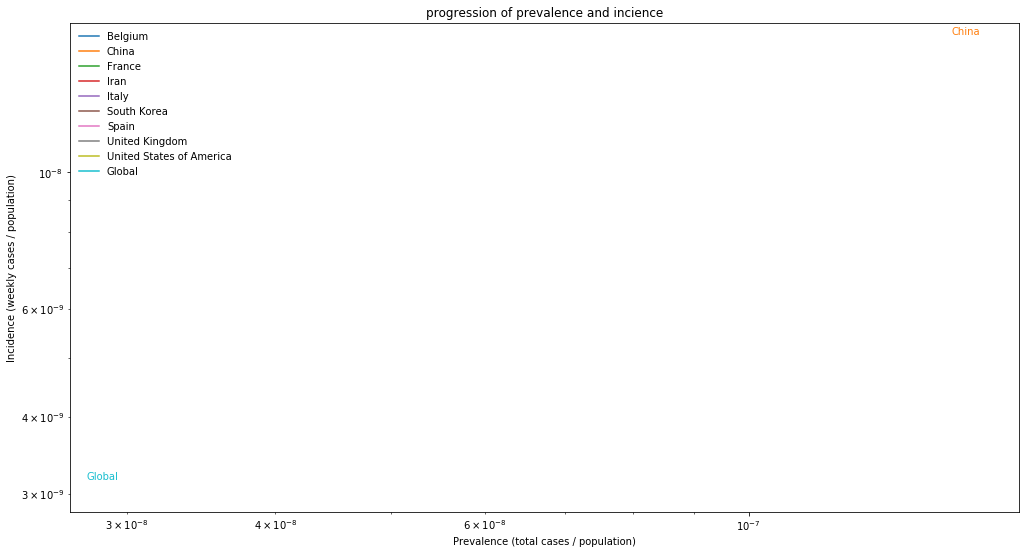

In [37]:
countries_of_interest = ['China', 'France', 'Italy', 'United States of America', 'Spain', 
                         'United Kingdom', 'Belgium', 'Iran', 'South Korea']
countries_of_interest.sort()

plot_trends_dynamically2(countries_of_interest)